In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [5]:
# define neural network class
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fun1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fun2 = torch.nn.Linear(hidden_size, output_size)
    def forward(self,x):
        out = self.fun1(x)
        out = self.relu(out)
        out = self.fun2(out)
        return out

In [6]:
# specify the parameters of the network
input_size = 1
hidden_size = 20
output_size = 1
# specify parameters of the learning algorithm
lr = 0.02
epoch_max = 10000

# create the nueral network
net = NeuralNetwork(input_size, hidden_size, output_size)

# create loss function and optimizer
objective = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [7]:
# sample the training data from the function to be approximated 
sigma_n = 0.1
n_train = 20

x_train = (np.random.rand(n_train, 1)-0.5)*2
x_train = x_train.reshape(n_train,1)
y_train = x_train**3 + sigma_n*np.random.randn(n_train, 1)

# convert data to pytorch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

In [8]:
# train the network
for epoch in range(epoch_max):
    # forward pass
    y_pred = net(x_train_tensor)
    loss = objective(y_pred, y_train_tensor)
    
    # backward pass and gradient step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"epoch: {epoch}, loss: {loss.item():4f}")

epoch: 0, loss: 0.148164
epoch: 1, loss: 0.141275
epoch: 2, loss: 0.135449
epoch: 3, loss: 0.130447
epoch: 4, loss: 0.126085
epoch: 5, loss: 0.122227
epoch: 6, loss: 0.118766
epoch: 7, loss: 0.115623
epoch: 8, loss: 0.112736
epoch: 9, loss: 0.110059
epoch: 10, loss: 0.107557
epoch: 11, loss: 0.105200
epoch: 12, loss: 0.102968
epoch: 13, loss: 0.100845
epoch: 14, loss: 0.098815
epoch: 15, loss: 0.096871
epoch: 16, loss: 0.095003
epoch: 17, loss: 0.093204
epoch: 18, loss: 0.091469
epoch: 19, loss: 0.089795
epoch: 20, loss: 0.088176
epoch: 21, loss: 0.086611
epoch: 22, loss: 0.085095
epoch: 23, loss: 0.083628
epoch: 24, loss: 0.082206
epoch: 25, loss: 0.080828
epoch: 26, loss: 0.079493
epoch: 27, loss: 0.078198
epoch: 28, loss: 0.076943
epoch: 29, loss: 0.075725
epoch: 30, loss: 0.074544
epoch: 31, loss: 0.073399
epoch: 32, loss: 0.072288
epoch: 33, loss: 0.071210
epoch: 34, loss: 0.070165
epoch: 35, loss: 0.069151
epoch: 36, loss: 0.068167
epoch: 37, loss: 0.067213
epoch: 38, loss: 0.066

Text(0.5, 1.0, 'cubic function')

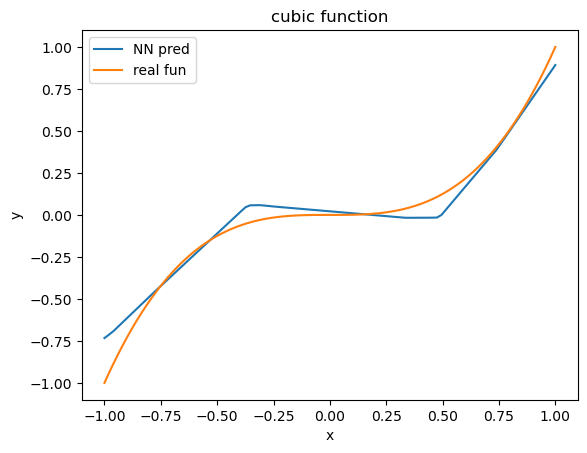

In [9]:
# test neural network
n_test = 100
x_test = np.linspace(-1, 1, n_test).reshape(n_test,1)

x_test_tensor = torch.from_numpy(x_test).float()
y_pred_tensor = net(x_test_tensor)

y_pred = y_pred_tensor.detach().cpu().numpy()
y_act = x_test**3

# plot results
plt.figure()
plt.plot(x_test, y_pred)
plt.plot(x_test, y_act)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['NN pred', 'real fun'])
plt.title('cubic function')